In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from math import radians, cos, sin, asin, sqrt
import functions as fun
# TemperatureDataProcessor sınıfını içe aktarın
from TemperatureDataProcessor import TemperatureDataProcessor

# Sınıfın bir örneğini oluşturun
processor = TemperatureDataProcessor()

# Load the data file and display the first five rows
data_path = 'GLT_ByMajorCity.csv'
data = processor.load_data(data_path)
data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [2]:
# Convert the 'dt' column to the datetime type using the processor class
data = processor.clean_and_transform_data(data)
data.dtypes  # Check the data types


dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
Year                                      int32
dtype: object

In [3]:
# Transform the 'Latitude' and 'Longitude' columns using the processor class
data = processor.transform_coordinates(data)

data.head()  # Display the results



,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [4]:
# Clean and transform the data using the processor class
data = processor.clean_and_transform_data(data)

# Save the cleaned and processed data set as 'MajorCities.csv'
cleaned_data_path = 'MajorCities.csv'
data.to_csv(cleaned_data_path, index=False)

# Path to the saved file
cleaned_data_path


'MajorCities.csv'

In [5]:
# Load the processed data file and inspect its contents
cleaned_data = pd.read_csv('MajorCities.csv')

# Display the first five rows
cleaned_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [6]:
# Calculate yearly maximum and minimum temperatures for each city using the processor class
city_yearly_temps = processor.calculate_city_yearly_temperature_ranges(cleaned_data)

# Find the largest temperature ranges for each city and select the top 10 cities using the processor class
top_cities_with_ranges = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities_with_ranges


,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1919,-20.179,26.572,46.751
64,Montreal,1761,-15.568,26.164,41.732
85,Shenyang,1922,-17.035,23.925,40.960
65,Moscow,2010,-15.846,24.580,40.426
48,Kiev,1929,-16.191,22.543,38.734
96,Toronto,1761,-11.312,25.649,36.961
92,Taiyuan,1930,-13.116,23.833,36.949
79,Saint Petersburg,1871,-18.644,17.592,36.236
71,New York,1761,-6.900,29.141,36.041


In [7]:
# Filter data for the years between 1920 and 1970 and find the top cities using the processor class
city_yearly_temps_period = processor.filter_data_by_year_range(city_yearly_temps, 1920, 1970)
top_cities_with_ranges_period = processor.find_top_cities_with_temp_ranges(city_yearly_temps_period)

top_cities_with_ranges_period



,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1922,-23.272,23.445,46.717
85,Shenyang,1922,-17.035,23.925,40.960
48,Kiev,1929,-16.191,22.543,38.734
65,Moscow,1956,-18.943,19.467,38.410
64,Montreal,1934,-17.961,20.073,38.034
92,Taiyuan,1930,-13.116,23.833,36.949
96,Toronto,1934,-15.502,20.057,35.559
94,Tianjin,1922,-7.931,27.222,35.153
73,Peking,1922,-7.931,27.222,35.153


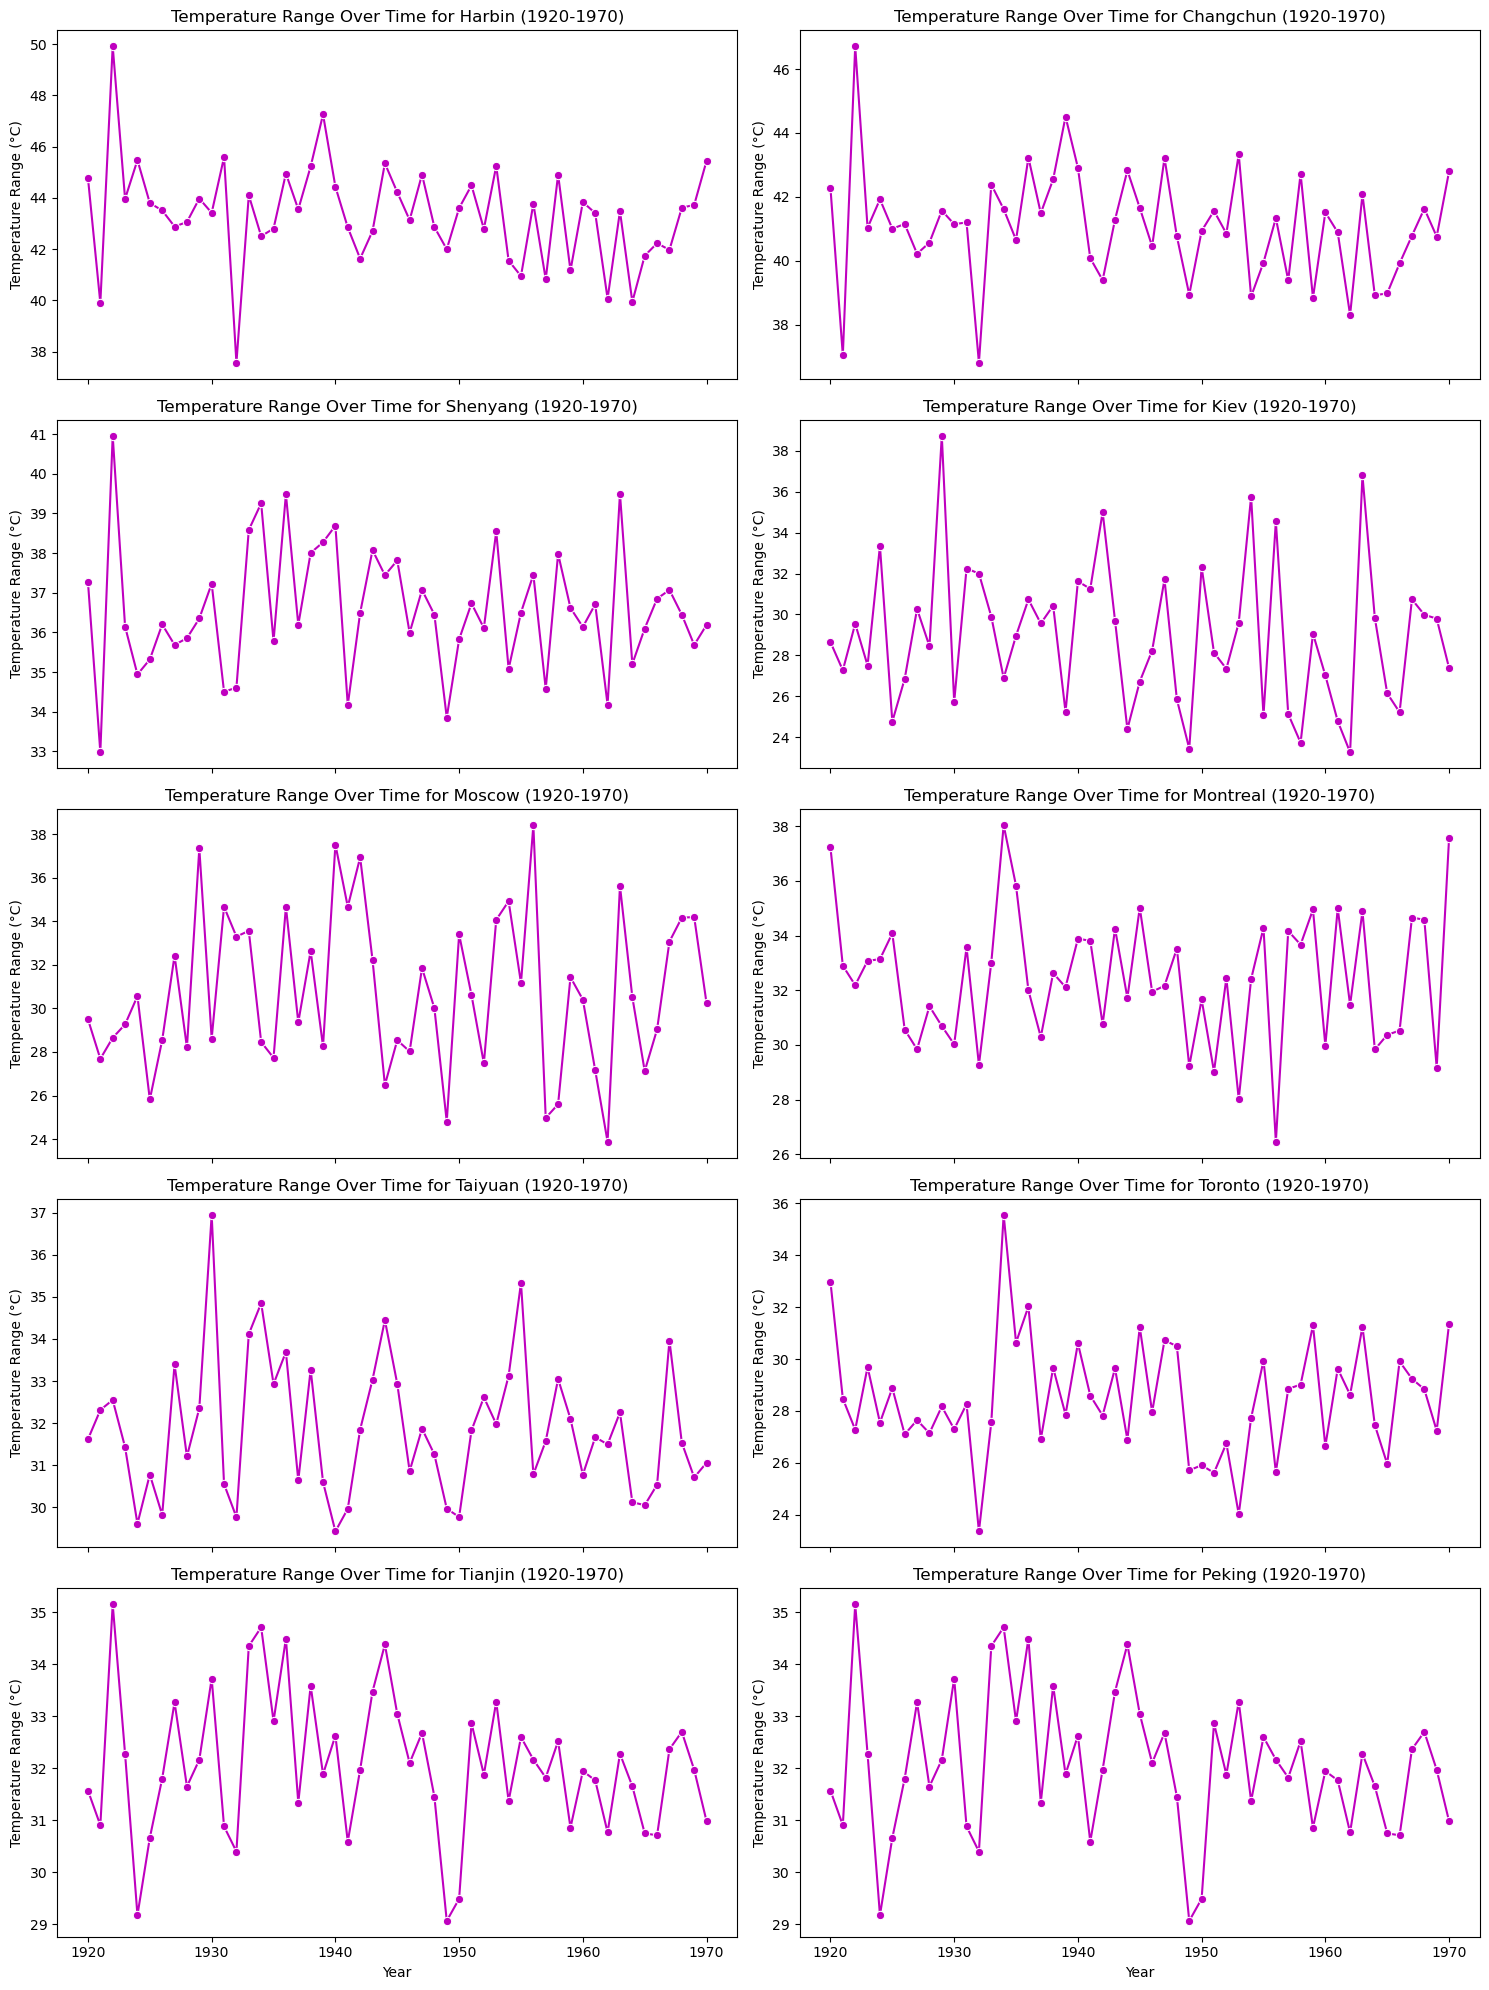

/Users/cihanelv/Desktop/xxx/functions.py:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


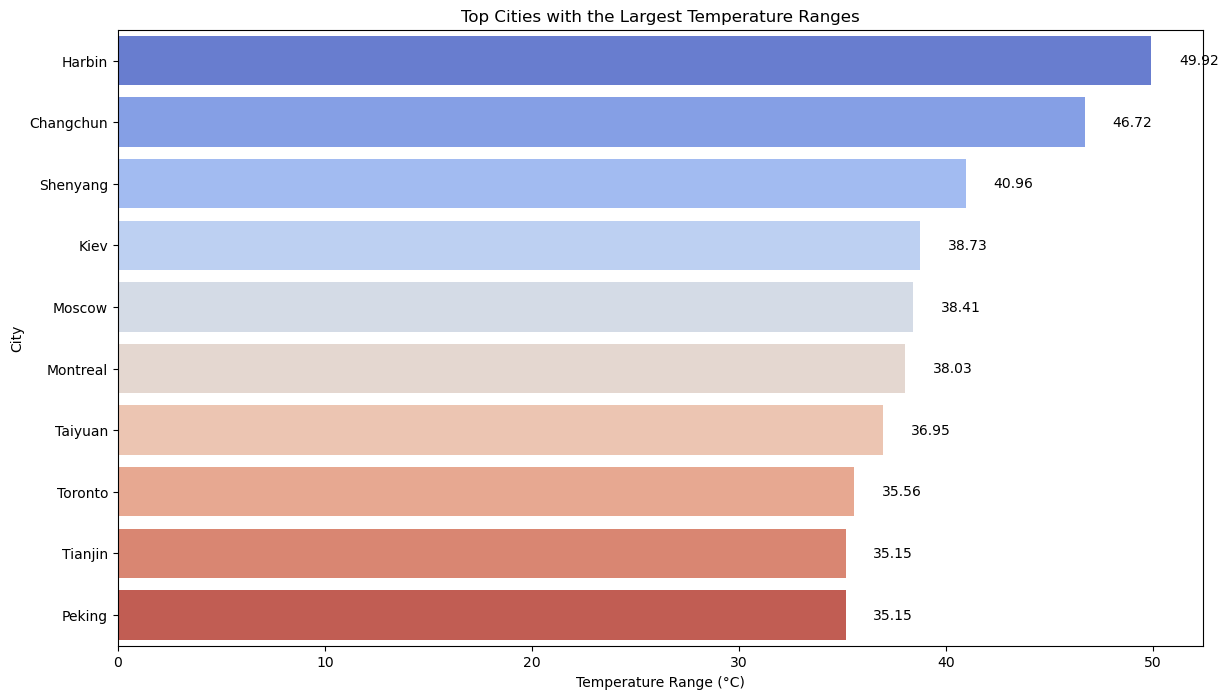

In [8]:
# Filter the data for the years between 1920 and 1970 and find the cities with the largest temperature ranges
city_yearly_temps_period = processor.filter_data_by_year_range(city_yearly_temps, 1920, 1970)
top_cities_with_ranges_period = processor.find_top_cities_with_temp_ranges(city_yearly_temps_period)

# Merge top cities with geographical data using the processor class
top_cities_geo = processor.merge_with_geographical_data(cleaned_data, top_cities_with_ranges_period)

# Plot the temperature range for 1920-1970 using functions from functions.py
fun.plot_temperature_range(city_data=city_yearly_temps_period, 
                           top_cities=top_cities_with_ranges_period['City'], 
                           start_year=1920, 
                           end_year=1970)

# Plot a bar graph for the temperature range based on data from 1920 to 1970
fun.plot_temperature_range_bar(city_data=top_cities_with_ranges_period, top_cities=top_cities_with_ranges_period['City'])


In [9]:
# Display the first few rows of the dataframe to understand its structure
cleaned_data.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63,-3.23,1849
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63,-3.23,1849


In [10]:
# Filter the data for the years between 1920 and 1970
filtered_data = processor.filter_data_by_year_range(cleaned_data, 1920, 1970)

# Calculate yearly temperature ranges using the processor class and find the top cities
city_yearly_temps = processor.calculate_city_yearly_temperature_ranges(filtered_data)
top_cities = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

top_cities


,City,Year,min,max,temp_range
34,Harbin,1922,-26.772,23.148,49.920
19,Changchun,1922,-23.272,23.445,46.717
85,Shenyang,1922,-17.035,23.925,40.960
48,Kiev,1929,-16.191,22.543,38.734
65,Moscow,1956,-18.943,19.467,38.410
64,Montreal,1934,-17.961,20.073,38.034
92,Taiyuan,1930,-13.116,23.833,36.949
96,Toronto,1934,-15.502,20.057,35.559
94,Tianjin,1922,-7.931,27.222,35.153
73,Peking,1922,-7.931,27.222,35.153


/Users/cihanelv/Desktop/xxx/functions.py:117: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


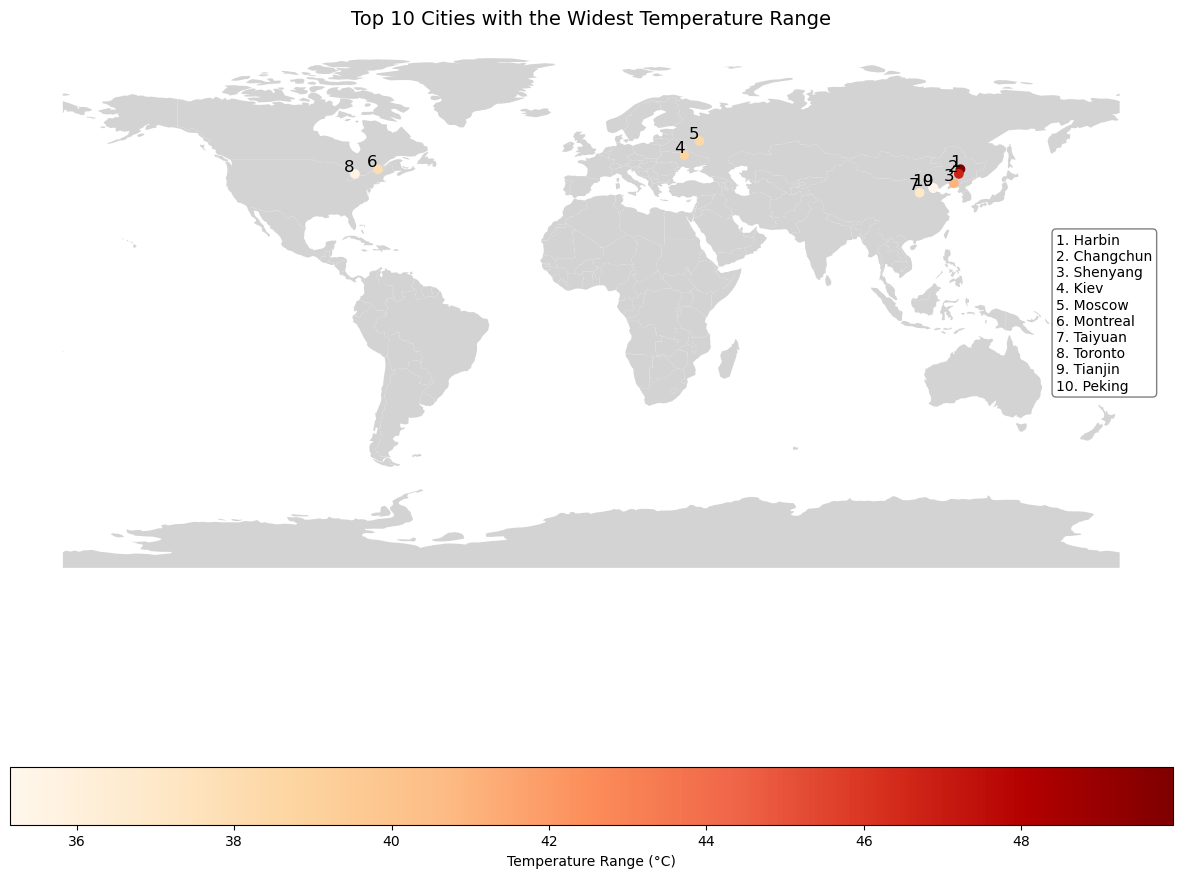

In [11]:
# 'MajorCities.csv' dosyasını yükleyin
major_cities_df = processor.load_data('MajorCities.csv')

# top_cities DataFrame'ini oluşturun
top_cities = processor.find_top_cities_with_temp_ranges(city_yearly_temps)

# MajorCities.csv'den alınan koordinat bilgilerini içeren DataFrame'i oluşturun
city_coordinates = major_cities_df[['City', 'Latitude', 'Longitude']].drop_duplicates()

# top_cities DataFrame'i ile şehir koordinatlarını birleştirin
top_cities_with_coords = pd.merge(top_cities, city_coordinates, on='City')

# Haritayı çizmek için güncellenmiş fonksiyonu çağırın
fun.plot_temperature_range_map(top_cities_with_coords, top_n=10)


In [12]:
# Load the CSV file using the processor class
cities_df = processor.load_data('MajorCities.csv')

# Extract the 'Year' from the 'dt' column
cities_df['Year'] = pd.to_datetime(cities_df['dt']).dt.year

# Filter the data for the years between 1920 and 1970 using the processor class
filtered_cities_df = processor.filter_data_by_year_range(cities_df, 1920, 1970)

# Calculate the yearly average temperature for each city
yearly_avg_temps = (
    filtered_cities_df.groupby(['City', 'Country', 'Latitude', 'Longitude', 'Year'])['AverageTemperature']
    .mean()
    .reset_index()
)

# Display the first five rows of the result
print(yearly_avg_temps.head())


      City        Country  Latitude  Longitude  Year  AverageTemperature
0  Abidjan  Côte D'Ivoire      5.63      -3.23  1920           26.324167
1  Abidjan  Côte D'Ivoire      5.63      -3.23  1921           26.420250
2  Abidjan  Côte D'Ivoire      5.63      -3.23  1922           26.229167
3  Abidjan  Côte D'Ivoire      5.63      -3.23  1923           25.962167
4  Abidjan  Côte D'Ivoire      5.63      -3.23  1924           26.092167


In [13]:
# "Peking" ve "Los Angeles" şehirlerinin koordinatlarını bulalım
peking_coords = cleaned_data[cleaned_data['City'] == 'Peking'].iloc[0]
los_angeles_coords = cleaned_data[cleaned_data['City'] == 'Los Angeles'].iloc[0]


peking_coords, los_angeles_coords

(dt                               1820-08-01
 AverageTemperature                   22.822
 AverageTemperatureUncertainty         2.218
 City                                 Peking
 Country                               China
 Latitude                              39.38
 Longitude                            116.53
 Year                                   1820
 Name: 167116, dtype: object,
 dt                                  1849-01-01
 AverageTemperature                       8.819
 AverageTemperatureUncertainty            2.558
 City                               Los Angeles
 Country                          United States
 Latitude                                 34.56
 Longitude                               -118.7
 Year                                      1849
 Name: 124389, dtype: object)

In [14]:
# Calculate the overall average yearly temperatures for each city
city_avg_temps = yearly_avg_temps.groupby(['City', 'Country', 'Latitude', 'Longitude'])['AverageTemperature'].mean().reset_index()
# Use the dataset with only one record per city to find the cities nearest to Beijing
nearest_to_peking = fun.find_nearest_cities(peking_coords, city_avg_temps)
print(nearest_to_peking)


        City Country  Latitude  Longitude  AverageTemperature    Distance
94   Tianjin   China     39.38     116.53           11.915804    0.000000
93  Tangshan   China     37.78     113.90           11.728559  289.660775
24    Dalian   China     39.38     120.69           10.246918  357.514905


In [15]:
route = fun.suggest_route(peking_coords, los_angeles_coords, city_avg_temps)

# Rota çıktısını yazdır
print(route)


['Peking', 'Tianjin', 'Jinan', 'Tangshan', 'Xian', 'Chongqing', 'Guangzhou', 'Taipei', 'Wuhan', 'Shanghai', 'Nanjing', 'Seoul', 'Dalian', 'Taiyuan', 'Chengdu', 'Rangoon', 'Bangkok', 'Ho Chi Minh City', 'Singapore', 'Surabaya', 'Jakarta', 'Madras', 'Hyderabad', 'Nagpur', 'Surat', 'Bombay', 'Ahmadabad', 'Karachi', 'Jaipur', 'Delhi', 'New Delhi', 'Kanpur', 'Calcutta', 'Dhaka', 'Bangalore', 'Lakhnau', 'Pune', 'Lahore', 'Faisalabad', 'Baghdad', 'Riyadh', 'Jiddah', 'Umm Durman', 'Cairo', 'Gizeh', 'Alexandria', 'Aleppo', 'Izmir', 'Istanbul', 'Rome', 'Madrid', 'Casablanca', 'Dakar', 'Lagos', 'Ibadan', 'Abidjan', 'Kano', 'Kinshasa', 'Luanda', 'Harare', 'Dar Es Salaam', 'Mogadishu', 'Durban', 'Addis Abeba', 'Nairobi', 'Cape Town', 'Salvador', 'Fortaleza', 'Rio De Janeiro', 'Brasília', 'Belo Horizonte', 'São Paulo', 'Bogotá', 'Santo Domingo', 'Cali', 'Lima', 'Mexico', 'Los Angeles']
